In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
import scipy.stats as stats
import statsmodels.formula.api as smf
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

# **Regression Problem Statistical Tests**

A data frame with 32 observations on 11 (numeric) variables.

1) mpg	Miles/(US) gallon

2)	cyl	Number of cylinders

3)	disp	Displacement (cu.in.)

4) hp	Gross horsepower

5)	drat	Rear axle ratio

6)	wt	Weight (1000 lbs)

7)	qsec	1/4 mile time

8)	vs	Engine (0 = V-shaped, 1 = straight)

9)	am	Transmission (0 = automatic, 1 = manual)

10)	gear	Number of forward gears

11)	carb	Number of carburetors

In [2]:
A  = pd.read_csv('mtcars.csv')
A.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [3]:
A.corr()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
mpg,1.000000,-0.852162,-0.847551,-0.776168,0.681172,-0.867659,0.418684,0.664039,0.599832,0.480285,-0.550925
cyl,-0.852162,1.000000,0.902033,0.832447,-0.699938,0.782496,-0.591242,-0.810812,-0.522607,-0.492687,0.526988
disp,-0.847551,0.902033,1.000000,0.790949,-0.710214,0.887980,-0.433698,-0.710416,-0.591227,-0.555569,0.394977
hp,-0.776168,0.832447,0.790949,1.000000,-0.448759,0.658748,-0.708223,-0.723097,-0.243204,-0.125704,0.749812
drat,0.681172,-0.699938,-0.710214,-0.448759,1.000000,-0.712441,0.091205,0.440278,0.712711,0.699610,-0.090790
wt,-0.867659,0.782496,0.887980,0.658748,-0.712441,1.000000,-0.174716,-0.554916,-0.692495,-0.583287,0.427606
qsec,0.418684,-0.591242,-0.433698,-0.708223,0.091205,-0.174716,1.000000,0.744535,-0.229861,-0.212682,-0.656249
vs,0.664039,-0.810812,-0.710416,-0.723097,0.440278,-0.554916,0.744535,1.000000,0.168345,0.206023,-0.569607
am,0.599832,-0.522607,-0.591227,-0.243204,0.712711,-0.692495,-0.229861,0.168345,1.000000,0.794059,0.057534
gear,0.480285,-0.492687,-0.555569,-0.125704,0.699610,-0.583287,-0.212682,0.206023,0.794059,1.000000,0.274073


### STATISTICAL Testing: 

We will manually check if the the poorly correlated features should be included in the model of not

In [ ]:
#First let's start with 'am' which stands for automatic or manual transmission. 1 is manual and 0 is automatic, we will be doing a Two-sample t-test
#Method 1: Using Logical Index

am_0 = A['mpg'][A['am'] == 0]
am_1 = A['mpg'][A['am'] == 1]

In [ ]:
from scipy import stats

In [ ]:
stats.ttest_ind(am_0, am_1)

Ttest_indResult(statistic=-4.106126983100689, pvalue=0.0002850207439350686)

**Method 2** 

Using GroupBy

In [ ]:
A_am = A.groupby('am')

In [ ]:
df_am0 = A_am.get_group(0)
df_am1 = A_am.get_group(1)

In [ ]:
df_am0.shape, df_am1.shape

((19, 12), (13, 12))

In [ ]:
#First Let's check the numerical difference

df_am0['mpg'].mean()

17.147368421052633

In [ ]:
df_am1['mpg'].mean()

24.39230769230769

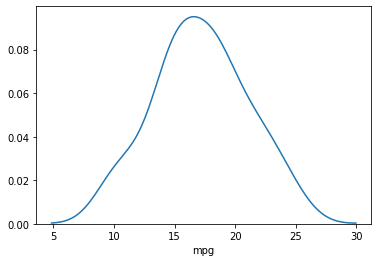

In [ ]:
sns.distplot(df_am0['mpg'], hist = False)
plt.show()

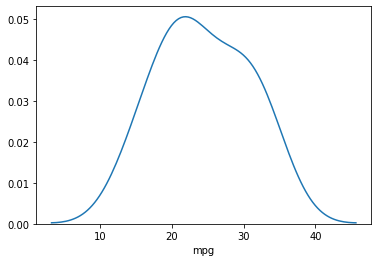

In [ ]:
sns.distplot(df_am1['mpg'], hist = False)
plt.show()

Numerically there is difference in the mean of the data. df_am0 is for automatic cars and df_am1 is for manual cars and we can see that manual cars mpg is higher than automatic cars.  Now, we need to prove it statiscally by performing a two-sample t-test.


H0: Mean_MPG(auto) = Mean_MPG(manual)

H1: Mean_MPG(auto) != Mean_MPG(manual)

Significant level of 0.05

In [ ]:
stats.ttest_ind(df_am0['mpg'], df_am1['mpg'])

Ttest_indResult(statistic=-4.106126983100689, pvalue=0.0002850207439350686)

**Interpretation**

Since the p-value (0.000285) < alpha (0.05) We reject the null hypothesis. State that the mean mpg for automatic and manual is not the same and we have to include the variable 'am' in our model. So variable 'am' can be a potential variable to predict mpg.   

## Check variable 'vs'

Variable 'vs' represents the engine shape, we want to see if the engine shape matters in the mpg, vs = 1 (straight-line enginer) and vs = 0 (v-shape engine).

In [ ]:
#Groupby Method

A_vs = A.groupby('vs')

In [ ]:
df_vs0 = A_vs.get_group(0)
df_vs1 = A_vs.get_group(1)

In [ ]:
stats.ttest_ind(df_vs0['mpg'],df_vs1['mpg'])

Ttest_indResult(statistic=-4.864384956122782, pvalue=3.415937254419951e-05)

P-value 3.41 e-05< Alpha (0.05), we can safely reject the null hypothesis and conclude that the mean of engine cyclinder configuration are statistically different and we need to included the variable 'vs' in the model.

## Check variable Gear

In [ ]:
A['gear'].value_counts()

#Total of 3 group, we will be using ANOVA test to statistcally test if the means are difference between these 3 groups

3    15
4    12
5     5
Name: gear, dtype: int64

In [ ]:
A_gear = A.groupby('gear')

In [ ]:
df_gear3 = A_gear.get_group(3)
df_gear4 = A_gear.get_group(4)
df_gear5 = A_gear.get_group(5)


In [ ]:
stats.f_oneway(df_gear3['mpg'], df_gear4['mpg'], df_gear5['mpg'])

F_onewayResult(statistic=10.900719688660931, pvalue=0.00029482799285719474)

Reject the null hypothesis, which tells us that the means are different and we have to included this variable in our analysis. 

##  Check Variable 'carb'

In [ ]:
A['carb'].value_counts()

4    10
2    10
1     7
3     3
8     1
6     1
Name: carb, dtype: int64

In [ ]:
A_carb = A.groupby('carb')

In [ ]:
df_carb0 = A_carb.get_group(4)
df_carb1 = A_carb.get_group(2)
df_carb2 = A_carb.get_group(1)
df_carb3 = A_carb.get_group(3)
df_carb4 = A_carb.get_group(8)
df_carb5 = A_carb.get_group(6)

In [ ]:
stats.f_oneway(df_carb0['mpg'],df_carb1['mpg'],df_carb2['mpg'],df_carb3['mpg'],df_carb4['mpg'],df_carb5['mpg'])

F_onewayResult(statistic=4.161431011489805, pvalue=0.006546174801270258)

Reject the null hypothesis and we can safely conclude that carb is also needed to be in the model. 

# Levene Test

**Check disp, hp, drat, wt, qsec**

LEVENE Test: Because Displacement (disp), Horsepower (hp), Rear Axel Ratio (drat), Weight (wt), Quarter Mile Performance (qsec) are ALL continuous features we can simply do a levene test. 

H0: Mean_MPG = Mean_Disp

H1: Mean_MPG != Mean_Disp 

and so and so forth for hp, drat, wt, and qsec

In [ ]:
print(stats.levene(A['mpg'], A['disp']))
print(stats.levene(A['mpg'], A['hp']))
print(stats.levene(A['mpg'], A['drat']))
print(stats.levene(A['mpg'], A['wt']))
print(stats.levene(A['mpg'], A['qsec']))

LeveneResult(statistic=77.24492658587923, pvalue=1.7125313376965402e-12)
LeveneResult(statistic=37.36520247187284, pvalue=7.171767125289592e-08)
LeveneResult(statistic=37.267914042270355, pvalue=7.398463502218914e-08)
LeveneResult(statistic=31.69030093574528, pvalue=4.661995109407837e-07)
LeveneResult(statistic=20.94643539498785, pvalue=2.3228981865792168e-05)


All the variable are statistically significant as the p-value for all the variables is less than alpha (0.05). We can safely reject the null hypothesis and conclude the means are statistically significant 

**Check if Cyclinder is Significant**

In [ ]:
A['cyl'].value_counts()

8    14
4    11
6     7
Name: cyl, dtype: int64

In [ ]:
A_cyl = A.groupby('cyl')

In [ ]:
df_cyl0 = A_cyl.get_group(8)
df_cyl1 = A_cyl.get_group(4)
df_cyl2 = A_cyl.get_group(6)


In [ ]:
stats.f_oneway(df_cyl0['mpg'],df_cyl1['mpg'],df_cyl2['mpg'])

F_onewayResult(statistic=39.69751525586905, pvalue=4.978919174400188e-09)

Conclude that Cylinder is also a signifant feature for the mode. P-value < alpha. We can reject the null hypothesis. 

Typically for a Regression problem in order to check if the independent variable is statiscally significant or not you need to perform one of three tests based values of the indepedent variables. Since the target variable (y) is always a continuous variable in a regression problems we only have these three tests.

These 3 tests are: 

from scipy.stats import levene, ttttest_ind, f_oneway

1.   Levene Test: One continuous vs One Continuous (Checks the variance)
2.   Two-Sample T Test: One continous vs. Two Discrete values (Checks for Mean difference across two groups)
3.   ANOVA: One continuous vs. 3 or more discrete values(Checks for Mean difference across multiple groups)


**Note:**

Although this process might seem laborious this exercise is done for practice. By doing a simple OLS summary these tests are automatically done by the algorithm. The purpose of this individual checking is to understand the backend operation. 


# Classification Problem Statistical Tests

In [5]:
df = pd.read_csv('HR_Employee_Attrition.csv')
df.head(3)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0


### Insights: 

The Target Variable is Attrition in our HR dataset. We are trying to predict if the employee has left the company or not based on the following variables. Let's find out the statistically significant features.

**Age: Two-Sample T-Test**

Age is continous variable and attrition is two discrete values

In [6]:
df_at = df.groupby('Attrition')

In [7]:
df_at1 = df_at.get_group('Yes')
df_at0 = df_at.get_group('No')

In [8]:
print('Avg Age of Employees who left the organization:', df_at1['Age'].mean())
print('Avg Age of Employees who are with the organization:', df_at0['Age'].mean())

#Numerically the means are different now let's check statistically

Avg Age of Employees who left the organization: 33.607594936708864
Avg Age of Employees who are with the organization: 37.561232765612324


In [9]:
stats.ttest_ind(df_at1['Age'], df_at0['Age'])

Ttest_indResult(statistic=-6.1786638353072165, pvalue=8.356308021103649e-10)

P-value (8.35 e-10) < Alpha (0.05), We can safely reject the null hypothesis and conclude that Age is an important factor for the model.

**Gender: Two-sample Proportion Test**

In [10]:
df['Gender'].replace(to_replace = ['Male', 'Female'], value = [1,2], inplace = True) #Changing the values of Male as 1 and Female as 2

H0: Proportion of Male Leaving the organization = Proportion of Female leaving the organization

H1: Proportion of Male Leaving the organization != Proportion of Female leaving the organization

In [11]:
ct1 = pd.crosstab(df['Attrition'], df['Gender'])
ct1 

Gender,1,2
Attrition,,
No,732,501
Yes,150,87


**Chi-square Manual Calculation**

In [12]:
#Proportion of males who left the organization

150/(732+150) 

0.17006802721088435

In [13]:
#Proportion of females who left the organization

87/(87+501)

0.14795918367346939

In [14]:
#Numerically there is a small difference in proportions between males and females who have left the organization now let's check it statistically

from scipy.stats import chi2_contingency 
from statsmodels.stats.proportion import proportions_ztest

In [15]:
n1 = ct1.iloc[:,0].sum()
n2 = ct1.iloc[:,1].sum()
x1 = ct1.iloc[1,0]
x2 = ct1.iloc[1,1]
x1,x2

(150, 87)

In [16]:
pp = (x1+x2)/(n1+n2)
pp

0.16122448979591836

In [17]:
p1 = x1/n1
p2 = x2/n2
p1,p2

(0.17006802721088435, 0.14795918367346939)

In [ ]:
zdata = (p1-p2)/np.sqrt((pp*(1-pp))*((1/n1)+(1/n2)))
zdata

1.1292547809155016

Rule of Rejection for Z-Test: 95% confidence, inorder to reject, the zdata > 1.96.

In this case:

zdata(1.129) < 1.96 (threshold). We will FAIL to reject the null and conclude that Gender is not an appropriate variable for the model. 

**Chi-Square Python Command calculation**

How to use the Proportions_Ztest command:

Counts and Observations:

Counts will contain the numerator ('Yes' values or what you are testing, in this case we are testing number of employees in male and female who quit the organization).

Observations: Total observations in each category

In [ ]:
counts = np.array([150,87]) #This includes employees in each catergory 150 (males) and 87 (females) who quit the organization

observations = np.array([(732+150), (87+501)]) #Total observations in each category (732+150 = 882 for males) and (87+501 = 588 for females), 

#CAUTION: in counts we gave 150 (corresponds with male) first followed by 87 (corresponds with female), YOU HAVE TO FOLLOW THIS ORDER IN  Observations, first gave males and then females

proportions_ztest(counts, observations)

(1.1292547809155016, 0.2587903704911598)

P-value (.2587) > alpha (0.05), Since the p-value is higher than our threshold of 0.05. We Fail the Reject the null hypothesis and conclude that the proportion of male and female are same. Which means, 2% numerical difference we found is statistically acceptable and Gender is not an appropriate variable for the model. 

Also, the Zdata is 1.129 < threshold (1.96), and p-value is .2587 which means there 25.87% distance from Zdata to the rejection threshold. 

## Chi-Square Test

In [ ]:
ob = np.array([410,340,250,95,85,70])
ex = np.array([404,340,256,101,85,64])

In [ ]:
chi_val = (((ob-ex)**2)/ex).sum()
chi_val

1.1486695544554455

In [ ]:
#Example using built-in function but first we put it in DataFrame
#Normally we give the crosstab in the stats test since the dataframe contains the total count we are technically doing that

CT = pd.DataFrame(np.array([[410,340,250],[95,85,70]]))
CT.columns = ['Healthy', 'Mild', 'Severe']
CT.index = ['Training', 'Testing']
CT

,Healthy,Mild,Severe
Training,410,340,250
Testing,95,85,70


In [ ]:
from scipy.stats import chi2_contingency 

In [ ]:
stats.chi2_contingency(CT)

(1.1486695544554455, 0.5630793174318253, 2, array([[404., 340., 256.],
        [101.,  85.,  64.]]))

First value is Chi-Square value, second is p-value, third is degrees of freedom, and fourth is Expected Count

Chi-Square value: 1.14866 (same as our calculation)

P-Value: 0.563 (High prob of null hyp, which means the proportion across healthy, mild, and severe is same)

Degrees of Freedom: 2 (Column with the Maximum categories - 1)

Expected Count



### Department

Deparment has multiple categories vs. Attrition (2 categories) so we'll be doing a chi-square test

In [ ]:
df['Department'].value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

In [ ]:
ct_d = pd.crosstab(df['Attrition'], df['Department'])
ct_d

Department,Human Resources,Research & Development,Sales
Attrition,,,
No,51,828,354
Yes,12,133,92


Quick Check for Yes Attrition in Sales, R&D, and HR

In [ ]:
ct_d['Sales'].sum()

446

We are saying that 20.6% != 13.8% != 19%, numerically this makes sense but let's check it statistically

Null and Alternative Hypothesis: 

Null : Proportion of attrition from across different departments is same. 

Alternative: Proportion is not same.


H0: P(A in HR) = P(A in RD) = P(A in S)

H1: P(A in HR) ! P(A in RD) != P(A in S)

In [ ]:
stats.chi2_contingency(ct_d)

(10.79600732241067,
 0.004525606574479633,
 2,
 array([[ 52.84285714, 806.06326531, 374.09387755],
        [ 10.15714286, 154.93673469,  71.90612245]]))

Interpretation:

P-value (0.0045) < alpha (0.05), we can reject the null hypothesis. Claim that proportion of across departments is different. We can also say that Sales department has a higher attrition rate compared to other departments. 

These are the statistical tests for classfication problem. As the target variable is discrete value. 

We can either perform:

1) Two Sample T-Test: One continous vs. Two Discrete values (Checks for Mean difference across two groups)

2) Two Sample Proportion Test: Two Discrete values vs. Two Discrete values (Checks for proportion difference across two groups)

3) ANOVA Test: One continuous vs. 3 or more discrete values(Checks for Mean difference across multiple groups

4) Chi-Square Test: 3 or more discrete values vs. 2 or more discrete values (Checks for proportion difference across multiple groups) 